# Trabalho 1 - Machine Learning II 
Prof: Carlos Padilha

#### Alunos:  

Roberto A. Coutinho  
Thais Galho


## Sistemas com Multi-classificadores ou Ensembles

#### Este trabalho visa avaliar o entendimento em relaçãao á construção de sistemas com multi-classificadores ou ensembles. Para tal, os alunos deverão fazer o seguinte:


* Implementar o algoritmo AdaBoost (nos mesmos moldes que fizemos com o algoritmo Bagging).
    – Podem escolher qualquer tipo de classificador (MLP, SVM, etc).
* Processar os dados presente no arquivo sonar.all-data.
* Realizar treinamento e teste usando validação cruzada com 10 folds.
* Avaliar os resultados em termos de acurácia, recall e precisão.

Obs: O trabalho pode ser feito em dupla e deve ser enviado por email (carlos.engcomp@gmail.com).

In [2]:
import numpy as np
import pandas as pd

# Modelos
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# K-fold CrossValidation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [125]:
imported_data = pd.read_csv('sonar.all-data.csv', header=None)

imported_data.iloc[:,-1] = imported_data.iloc[:,-1].astype('category')
categories = imported_data.select_dtypes(['category']).columns
imported_data[categories] = imported_data[categories].apply(lambda x:x.cat.codes) 

imported_data = imported_data.sample(frac=1).reset_index(drop=True)

imported_data.head(50)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
1,0.0635,0.0709,0.0453,0.0333,0.0185,0.1260,0.1015,0.1918,0.3362,0.3900,...,0.0048,0.0025,0.0087,0.0072,0.0095,0.0086,0.0085,0.0040,0.0051,0
2,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,0
3,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,0
4,0.0228,0.0106,0.0130,0.0842,0.1117,0.1506,0.1776,0.0997,0.1428,0.2227,...,0.0098,0.0178,0.0077,0.0074,0.0095,0.0055,0.0045,0.0063,0.0039,0
5,0.0707,0.1252,0.1447,0.1644,0.1693,0.0844,0.0715,0.0947,0.1583,0.1247,...,0.0156,0.0197,0.0135,0.0127,0.0138,0.0133,0.0131,0.0154,0.0218,0
6,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
7,0.0442,0.0477,0.0049,0.0581,0.0278,0.0678,0.1664,0.1490,0.0974,0.1268,...,0.0204,0.0216,0.0135,0.0055,0.0073,0.0080,0.0105,0.0059,0.0105,1
8,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051,1
9,0.0294,0.0123,0.0117,0.0113,0.0497,0.0998,0.1326,0.1117,0.2984,0.3473,...,0.0056,0.0104,0.0079,0.0014,0.0054,0.0015,0.0006,0.0081,0.0043,0


In [126]:
from sklearn import preprocessing
# Separação entre dados e labels

labels = imported_data.iloc[:,-1]

data = imported_data.iloc[:,:-1]
len(data), len(labels)

(208, 208)

In [136]:
#labels.head(100)

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

def printCM(Y_test, predictions):
    cm = confusion_matrix(Y_test, predictions)
    acc_score = accuracy_score(Y_test, predictions)
    prec_score = precision_score(Y_test, predictions, average='weighted')
    
    print ('Confusion Matrix : ')
    print (cm)
    print
    
    tn = float(cm[0][0])
    fp = float(cm[0][1])
    fn = float(cm[1][0])
    tp = float(cm[1][1])

    actual_yes = fn+tp
    actual_no = tn+fp
    predicted_yes = fp+tp
    predicted_no = tn+fn

    total = float(len(imported_data))
    print ('Total : '+ str(total))

    print ('Acurácia : ' + str(acc_score))

    misclassification_rate = round((fp+fn)/total,3) # Overall, how often is it wrong?
    print ('Misclassification rate : ' +str(misclassification_rate))

    true_positive = round(tp/actual_yes,3) # When it's actually yes, how often does it predict yes?
    print ('True positives : ' +str(true_positive))

    false_positive = round(fp/actual_no,3) # When it's actually no, how often does it predict yes?
    print ('False positives : ' +str(false_positive))

    specificity = round(tn/actual_no,3) # When it's actually no, how often does it predict no?
    print ('Specificity : ' +str(specificity))

    #precision = round(tp/predicted_yes,3) # When it predicts yes, how often is it correct?
    print ('Precision : ' +str(prec_score))

    prevalence = round(actual_yes/total,3) # How often does the yes condition actually occur in our sample?
    print ('Prevalence : ' +str(prevalence))
    
    recall = round(tp / (tp + fn), 3)
    print ('Recall : ' +str(recall))

    #f1 = round(2 * ((precision * true_positive) / (precision + true_positive)),3)
    #print ('F1 Score : ' +str(f1))
    
    return acc_score, prec_score, recall

<h2>Separação entre treino e teste</h2>

In [144]:

# utiliza 25% do dataset para teste
trainData, validationData, trainLabels, validationLabels = train_test_split(data, labels, 
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    stratify=labels,
                                                    random_state=43)

print(len(trainData), len(trainLabels))
print(len(validationData), len(validationLabels))

166 166
42 42


In [200]:
scores = []
scores_test = []

error_train = []
error_test = []

n_modelos = 5
alpha = 0.5

print()
print("....Iniciando treinamento com 10 K-folds...." )
print()

# Define quantos folds
kf = KFold(n_splits=10)
kfold = 0    
for train_index, test_index in kf.split(trainData):
    
    print("################################################")
    print("K-fold : "+str(kfold+1))    
    print("################################################")
    #print(train_index, test_index)
    #print()

    # Obten os subdados de treinamento e teste no n fold
    #---------------------------------------------------------------------
    X_train, X_test = trainData.iloc[train_index,:], trainData.iloc[test_index,:]
    #print(len(X_train), len(X_test))

    y_train, y_test = trainLabels.iloc[train_index], trainLabels.iloc[test_index]
    #print(len(y_train), len(y_test))
    
    print("....Inicializando vetor de pesos....")
    print()


    n_train, n_test = len(X_train), len(X_test)
    #pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]

    # Initialize weights
    w = np.ones(n_train) / n_train
    print(w)
    
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    #print(pred_train)
    
    # Fit um classificador
    model = DecisionTreeClassifier(max_depth = 1, random_state = 1)
    
    model_index = 0
    for i in range(n_modelos):
        print()
        # Treina o modelo de classificação
        #---------------------------------------------------------------------
        print("Treinando o modelo....")

        # Treina o classificador com os pesos de treinamento
        model.fit(X=X_train, y=y_train, sample_weight=w)
        print(model)

        # Classifica o treino
        pred_train_i = model.predict(X_train)
        #print(pred_train_i)

        # Classifica o teste
        pred_test_i = model.predict(X_test)
        #print(pred_test_i)        

        print()
        print("...:::: Avaliação ::::....  ")
        print()

        # Obtem o index dos erros da classificação de treino e teste
        #---------------------------------------------------------------------
        missTrain = [int(x) for x in (pred_train_i != y_train)]
        #print("Training Miss : "+str(missTrain))
        missTest = [int(x) for x in (pred_test_i != y_test)]
        #print("Testing Miss : "+str(missTest))

        # Equivale os valores entre 1/-1 para atualização dos pesos
        #---------------------------------------------------------------------
        miss2Train = [x if x==1 else -1 for x in missTrain]
        #print("Training Miss2 : "+str(miss2))
        miss2Test = [x if x==1 else -1 for x in missTest]
        #print("Testing Miss2 : "+str(miss2Test))


        # Calcula o erro
        #---------------------------------------------------------------------
        err_m = np.dot(w, missTrain) / sum(w)
        print("Error : "+str(err_m))

        # Calcula o Alpha 
        #---------------------------------------------------------------------
        alpha_m = alpha * np.log( (1 - err_m) / float(err_m))
        print("Alpha : "+str(alpha_m))


        # Mostra a Matriz de Confusão para treino e teste
        #---------------------------------------------------------------------
        print()
        print(":: Treinamento :: ")
        print("")
        train_acc_score, train_precision_score, train_recall_score = printCM(y_train, pred_train_i)

        print()
        print(":: Teste ::")
        print()
        test_acc_score, test_precision_score, test_recall_score = printCM(y_test, pred_test_i)
        print


        # Atualiza os valores dos pesos
        #---------------------------------------------------------------------
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2Train]))
        print()
        print("Novos pesos atualizados : ")
        print(w)
        print()
        print("---------------------------------------------------------------------------")
        print()


        scores.append([kfold, model_index, train_acc_score, train_precision_score, train_recall_score, err_m, alpha_m, model])
        scores_test.append([kfold, model_index, test_acc_score, test_precision_score, test_recall_score, err_m, alpha_m, model])
        error_train.append([kfold, model_index, err_m, alpha_m])
    
        model_index += 1
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, [x * alpha_m for x in pred_test_i])]
        
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    #print(pred_train)
    print()
    print()
    kfold += 1 
    print
    print


....Iniciando treinamento com 10 K-folds....

################################################
K-fold : 1
################################################
....Inicializando vetor de pesos....

[0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141 0.00671141
 0

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

...:::: Avaliação ::::....  

Error : 0.30010861594741883
Alpha : 0.42339034753798355

:: Treinamento :: 

Confusion Matrix : 
[[31 48]
 [ 9 61]]
Total : 208.0
Acurácia : 0.6174496644295302
Misclassification rate : 0.274
True positives : 0.871
False positives : 0.608
Specificity : 0.392
Precision : 0.6738208854134597
Prevalence : 0.337
Recall : 0.871

:: Teste ::

Confusion Matrix : 
[[2 8]
 [2 5]]
Total : 208.0
Acurácia : 0.4117647058823529
Misclassification rate : 0.048
True positives : 0.714
False positives : 0.8
Specificity : 0.2
Precision : 0.45248868778280543
Prevalence : 0.034
Recall : 0.714

Novos pesos atualizados : 
[0.00265935 0.0055894

Confusion Matrix : 
[[10  2]
 [ 2  3]]
Total : 208.0
Acurácia : 0.7647058823529411
Misclassification rate : 0.019
True positives : 0.6
False positives : 0.167
Specificity : 0.833
Precision : 0.7647058823529411
Prevalence : 0.024
Recall : 0.6

Novos pesos atualizados : 
[0.00378814 0.00378814 0.01189054 0.00378814 0.00378814 0.01189054
 0.00378814 0.00378814 0.00378814 0.00378814 0.00378814 0.00378814
 0.00378814 0.00378814 0.01189054 0.01189054 0.00378814 0.00378814
 0.01189054 0.01189054 0.00378814 0.00378814 0.00378814 0.00378814
 0.00378814 0.01189054 0.00378814 0.00378814 0.00378814 0.00378814
 0.00378814 0.00378814 0.00378814 0.00378814 0.01189054 0.00378814
 0.00378814 0.00378814 0.00378814 0.00378814 0.00378814 0.00378814
 0.01189054 0.00378814 0.00378814 0.00378814 0.00378814 0.01189054
 0.00378814 0.01189054 0.01189054 0.01189054 0.00378814 0.01189054
 0.00378814 0.00378814 0.00378814 0.00378814 0.00378814 0.01189054
 0.00378814 0.00378814 0.01189054 0.00378814 0.00378814 0.00

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

...:::: Avaliação ::::....  

Error : 0.34286055967471796
Alpha : 0.3252862004771782

:: Treinamento :: 

Confusion Matrix : 
[[23 58]
 [ 1 68]]
Total : 208.0
Acurácia : 0.6066666666666667
Misclassification rate : 0.284
True positives : 0.986
False positives : 0.716
Specificity : 0.284
Precision : 0.7657539682539682
Prevalence : 0.332
Recall : 0.986

:: Teste ::

Confusion Matrix : 
[[1 7]
 [1 7]]
Total : 208.0
Acurácia : 0.5
Misclassification rate : 0.038
True positives : 0.875
False positives : 0.875
Specificity : 0.125
Precision : 0.5
Prevalence : 0.038
Recall : 0.875

Novos pesos atualizados : 
[0.0027555  0.00528129 0.01612936 0.0027555  0.00

Confusion Matrix : 
[[73  5]
 [55 17]]
Total : 208.0
Acurácia : 0.6
Misclassification rate : 0.288
True positives : 0.236
False positives : 0.064
Specificity : 0.936
Precision : 0.6674715909090908
Prevalence : 0.346
Recall : 0.236

:: Teste ::

Confusion Matrix : 
[[10  1]
 [ 4  1]]
Total : 208.0
Acurácia : 0.6875
Misclassification rate : 0.024
True positives : 0.2
False positives : 0.091
Specificity : 0.909
Precision : 0.6473214285714286
Prevalence : 0.024
Recall : 0.2

Novos pesos atualizados : 
[0.00276075 0.00234413 0.006909   0.00261807 0.00276075 0.00331161
 0.00234413 0.00112358 0.00276075 0.00261807 0.00276075 0.00546206
 0.00546206 0.00234413 0.01895993 0.006909   0.00643283 0.00112358
 0.00813694 0.006909   0.00234413 0.00234413 0.00276075 0.00276075
 0.00575973 0.00331161 0.00276075 0.00234413 0.00234413 0.00261807
 0.00276075 0.00546206 0.00234413 0.00643283 0.00813694 0.00234413
 0.00112358 0.00276075 0.00643283 0.00276075 0.00276075 0.00234413
 0.00813694 0.00276075 0.002

In [221]:
#error_train

<h2>Apresentação dos Resultados</h2>

In [215]:
scoresDF = pd.DataFrame(scores, columns=["n-fold", 
                                         "Model Idx",
                                         "Acc", 
                                         "Precision", 
                                         "Recall",
                                         "Error", 
                                         "Alpha", 
                                         "Model"])

scoresDF = scoresDF.sort_values(["Error"], ascending=False)
scoresDF = scoresDF.reset_index(drop=True)
scoresDF

,n-fold,Model Idx,Acc,Precision,Recall,Error,Alpha,Model
0,3,1,0.691275,0.730376,0.412,0.354966,0.298641,"DecisionTreeClassifier(class_weight=None, crit..."
1,7,1,0.606667,0.655689,0.243,0.345963,0.318417,"DecisionTreeClassifier(class_weight=None, crit..."
2,2,4,0.711409,0.714398,0.538,0.343233,0.324460,"DecisionTreeClassifier(class_weight=None, crit..."
3,6,1,0.606667,0.765754,0.986,0.342861,0.325286,"DecisionTreeClassifier(class_weight=None, crit..."
4,9,3,0.626667,0.661250,0.242,0.331526,0.350645,"DecisionTreeClassifier(class_weight=None, crit..."
5,0,1,0.630872,0.741690,0.957,0.330326,0.353356,"DecisionTreeClassifier(class_weight=None, crit..."
6,0,3,0.604027,0.654423,0.243,0.329606,0.354983,"DecisionTreeClassifier(class_weight=None, crit..."
7,7,4,0.646667,0.650505,0.486,0.328928,0.356519,"DecisionTreeClassifier(class_weight=None, crit..."
8,8,1,0.620000,0.747200,0.972,0.324013,0.367695,"DecisionTreeClassifier(class_weight=None, crit..."
9,1,1,0.624161,0.713117,0.929,0.322394,0.371396,"DecisionTreeClassifier(class_weight=None, crit..."


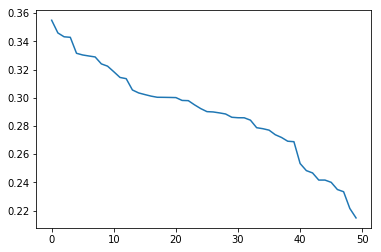

In [220]:
import matplotlib.pyplot as plt

df_error = scoresDF.copy()

plt.figure()

plot1 = plt.plot(df_error.index.values, df_error["Error"])
#plot1.set_xlabel('Number of iterations', fontsize = 12)
#plot1.set_xticklabels(range(0,450,50))
#plot1.set_ylabel('Error rate', fontsize = 12)
#plot1.set_title('Error rate vs number of iterations', fontsize = 16)
#plt.axhline(y=error_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [219]:
df_error.head(10)

,n-fold,Model Idx,Acc,Precision,Recall,Error,Alpha,Model
0,3,1,0.691275,0.730376,0.412,0.354966,0.298641,"DecisionTreeClassifier(class_weight=None, crit..."
1,7,1,0.606667,0.655689,0.243,0.345963,0.318417,"DecisionTreeClassifier(class_weight=None, crit..."
2,2,4,0.711409,0.714398,0.538,0.343233,0.324460,"DecisionTreeClassifier(class_weight=None, crit..."
3,6,1,0.606667,0.765754,0.986,0.342861,0.325286,"DecisionTreeClassifier(class_weight=None, crit..."
4,9,3,0.626667,0.661250,0.242,0.331526,0.350645,"DecisionTreeClassifier(class_weight=None, crit..."
5,0,1,0.630872,0.741690,0.957,0.330326,0.353356,"DecisionTreeClassifier(class_weight=None, crit..."
6,0,3,0.604027,0.654423,0.243,0.329606,0.354983,"DecisionTreeClassifier(class_weight=None, crit..."
7,7,4,0.646667,0.650505,0.486,0.328928,0.356519,"DecisionTreeClassifier(class_weight=None, crit..."
8,8,1,0.620000,0.747200,0.972,0.324013,0.367695,"DecisionTreeClassifier(class_weight=None, crit..."
9,1,1,0.624161,0.713117,0.929,0.322394,0.371396,"DecisionTreeClassifier(class_weight=None, crit..."


In [16]:
bestModel = scoresDF.iloc[0, 7]

In [12]:
pred_validation = bestModel.predict(validationData)

In [13]:
printCM(validationLabels, pred_validation)

Confusion Matrix : 
[[11 11]
 [ 5 15]]
Total : 208.0
Acurácia : 0.6190476190476191
Misclassification rate : 0.077
True positives : 0.75
False positives : 0.5
Specificity : 0.5
Precision : 0.6348443223443223
Prevalence : 0.096
Recall : 0.75


(0.6190476190476191, 0.6348443223443223, 0.75)

In [9]:
scoresDF = pd.DataFrame(scores_test, columns=["n-fold", 
                                         "Model Idx",
                                         "Acc", 
                                         "Precision", 
                                         "Recall",
                                         "Error", 
                                         "Alpha", 
                                         "Model"])

scoresDF.sort_values(["Acc","Error"], ascending=False)

,n-fold,Model Idx,Acc,Precision,Recall,Error,Alpha,Model
42,8,2,0.875000,0.875000,0.833,0.284386,0.461404,"DecisionTreeClassifier(class_weight=None, crit..."
27,5,2,0.823529,0.824421,0.714,0.292199,0.442364,"DecisionTreeClassifier(class_weight=None, crit..."
15,3,0,0.823529,0.824421,0.714,0.234899,0.590425,"DecisionTreeClassifier(class_weight=None, crit..."
37,7,2,0.812500,0.892857,1.000,0.272401,0.491237,"DecisionTreeClassifier(class_weight=None, crit..."
40,8,0,0.812500,0.823413,0.833,0.233333,0.594792,"DecisionTreeClassifier(class_weight=None, crit..."
5,1,0,0.764706,0.783193,0.667,0.228188,0.609286,"DecisionTreeClassifier(class_weight=None, crit..."
20,4,0,0.764706,0.764706,0.667,0.228188,0.609286,"DecisionTreeClassifier(class_weight=None, crit..."
48,9,3,0.750000,0.750000,0.750,0.297824,0.428841,"DecisionTreeClassifier(class_weight=None, crit..."
45,9,0,0.750000,0.766667,0.625,0.240000,0.576340,"DecisionTreeClassifier(class_weight=None, crit..."
35,7,0,0.750000,0.800000,0.750,0.226667,0.613615,"DecisionTreeClassifier(class_weight=None, crit..."
